In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
PINT = pd.read_csv('PINTv811.csv', index_col='UID')

In [3]:
PINT

,OLD_DATA,REF,IDENT,SLAT,SLONG,AGE,DAGE,AGEMTD,CONTINENT,REPLOC,...,QSTAT,QTRM,QALT,QMD,QACN,QTECH,QLITH,QMAG,QDIR,QPI
UID,,,,,,,,,,,,,,,,,,,,,
1,1,1,Joshua Hotaka Yama,36.800,139.200,1.80,0.20,K-Ar,Asia,Japan,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,2,Aragats,41.000,45.000,1.00,1.00,Stratigraphy,Europe,Armenia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2,Stepanavan,41.000,46.000,2.60,0.80,Stratigraphy,Europe,Armenia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4,Anahola 05,22.300,201.100,4.45,0.65,K-Ar,Pacific Ocean,Hawaii,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
5,6,4,Anahola 07,22.300,201.100,4.45,0.65,K-Ar,Pacific Ocean,Hawaii,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,NaN,783,CR03,10.571,-85.687,130.00,2.25,Ar/Ar,North America,Costa Rica,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
4656,NaN,783,CR05,10.589,-85.680,112.40,0.45,Ar/Ar,North America,Costa Rica,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
4657,NaN,783,CR06,10.588,-85.679,112.40,0.45,Ar/Ar,North America,Costa Rica,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0


In [4]:
GPTS = pd.read_csv('GPTS.csv')
GPTS

,start of normal chron,end of normal chron
0,0.000,0.780
1,0.990,1.070
2,1.770,1.950
3,2.140,2.150
4,2.581,3.040
...,...,...
88,71.071,71.338
89,71.587,73.004
90,73.291,73.374
91,73.619,79.075


In [19]:
GPTS['chron length'] = GPTS.apply(
    lambda row: row['end of normal chron'] - row['start of normal chron'], axis=1)

In [5]:
def combine_VDM(row):
    if pd.isna(row['VDM']) == False :
        return row['VDM']
    elif pd.isna(row['VADM']) == False :
        return row['VADM']
    else:
        return row['VDM/VADM']
PINT['allVDM'] = PINT.apply(lambda row: combine_VDM(row), axis=1)


In [44]:
def calc_rev_freq(lowerAgeLimit, upperAgeLimit, plot=True):
    
    GPTSselected = GPTS[(GPTS['end of normal chron']>=lowerAgeLimit) & (GPTS['start of normal chron']<=upperAgeLimit)]
    reversalList = GPTSselected['start of normal chron'].tolist() + GPTSselected['end of normal chron'].tolist()
    
    for item in reversalList.copy():
        if item < lowerAgeLimit or item > upperAgeLimit:
            reversalList.remove(item)
    
    gptsList = GPTSselected.drop('end of normal chron', axis=1)
    gptsList = list(gptsList.itertuples(index=False, name=None))
    #print(gptsList)
    if plot==True:
        fig, ax = plt.subplots()
        ax.broken_barh(gptsList, (0,1), facecolors='black')
        ax.get_yaxis().set_visible(False)
        ax.set_xlabel('Age (ma)')
    
    reversalFreq = (len(reversalList)/(upperAgeLimit - lowerAgeLimit))
    print(f'({len(reversalList)}/({upperAgeLimit} - {lowerAgeLimit}))')
    print(reversalList)
    return reversalFreq

(7/(16 - 14))
[14.178, 14.8, 15.034, 14.076, 14.612, 14.888, 15.155]


3.5

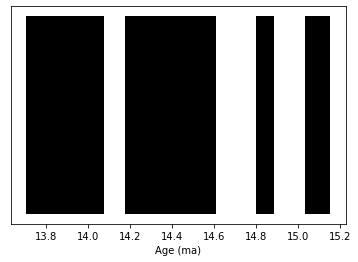

In [45]:
calc_rev_freq(14,16)

In [20]:
PINT

,OLD_DATA,REF,IDENT,SLAT,SLONG,AGE,DAGE,AGEMTD,CONTINENT,REPLOC,...,QTRM,QALT,QMD,QACN,QTECH,QLITH,QMAG,QDIR,QPI,allVDM
UID,,,,,,,,,,,,,,,,,,,,,
1,1,1,Joshua Hotaka Yama,36.800,139.200,1.80,0.20,K-Ar,Asia,Japan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.280702
2,2,2,Aragats,41.000,45.000,1.00,1.00,Stratigraphy,Europe,Armenia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.932283
3,3,2,Stepanavan,41.000,46.000,2.60,0.80,Stratigraphy,Europe,Armenia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.807257
4,5,4,Anahola 05,22.300,201.100,4.45,0.65,K-Ar,Pacific Ocean,Hawaii,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.800000
5,6,4,Anahola 07,22.300,201.100,4.45,0.65,K-Ar,Pacific Ocean,Hawaii,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,NaN,783,CR03,10.571,-85.687,130.00,2.25,Ar/Ar,North America,Costa Rica,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,83.000000
4656,NaN,783,CR05,10.589,-85.680,112.40,0.45,Ar/Ar,North America,Costa Rica,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,53.200000
4657,NaN,783,CR06,10.588,-85.679,112.40,0.45,Ar/Ar,North America,Costa Rica,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,86.600000


4565 N 
N
4566 N 
N
4567 R 
R
4568 R 
R
4570 R 
R
4572 R 
R
4576 R 
R


,OLD_DATA,REF,IDENT,SLAT,SLONG,AGE,DAGE,AGEMTD,CONTINENT,REPLOC,...,QTRM,QALT,QMD,QACN,QTECH,QLITH,QMAG,QDIR,QPI,allVDM
UID,,,,,,,,,,,,,,,,,,,,,
2911,NaN,605,Hampton park,-36.950000,174.890000,0.05500,0.0050,K-Ar,Pacific Ocean,New Zealand,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,2.107429
3197,8526,639,mc13,-77.640000,166.410000,0.05500,0.0100,Ar/Ar,Antarctica,Antarctica,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0,4.243983
4124,NaN,717,T25-28,-35.083333,347.716667,0.05545,0.0137,Ar/Ar,Atlantic Ocean,Tristan da Cunha,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,4.020544
3198,8528,639,mc28,-78.290000,164.730000,0.06000,0.0060,Ar/Ar,Antarctica,Antarctica,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.956964
3405,8970,663,mc225,-77.581000,166.802000,0.06000,0.0100,Ar/Ar,Antarctica,Antarctica,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,6.0,4.070346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,6406,512,0334x171p01,37.000000,326.000000,9.80000,0.5000,GPTS,Atlantic Ocean,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,5.500000
2239,2950,194,SJG16,26.500000,247.300000,9.90000,1.9000,Estimated,North America,Mexico,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,6.795202
2238,2949,194,SJG15,26.500000,247.300000,9.90000,1.9000,Estimated,North America,Mexico,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0,7.018672


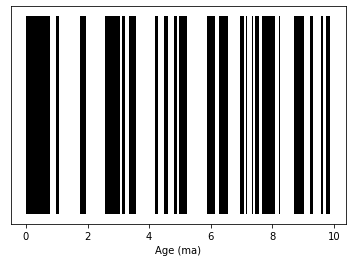

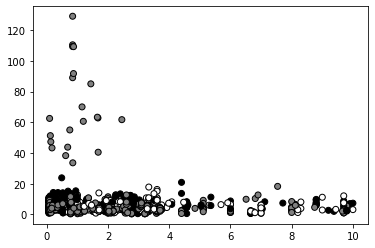

In [25]:
lowerAgeLimit = 0
upperAgeLimit = 10 #ma
QPIfilter = 3 #QPI score must be greater than or equal to filter



GPTS['chron length'] = GPTS.apply(
    lambda row: row['end of normal chron'] - row['start of normal chron'], axis=1)



PINTselected = PINT[(PINT.QPI>=QPIfilter) & (PINT.AGE>=lowerAgeLimit) & (PINT.AGE<=upperAgeLimit)]

##Fix missing polarity values with filler
values = {"P": 'O'}
PINTselected = PINTselected.fillna(value=values)

for i in range(len(PINTselected)):
    pol1 = PINTselected.loc[PINTselected.index[i], 'P'] 
    if pol1 not in ['N' ,'R', 'T', 'O']:
        print (PINTselected.index[i], pol1)
        if pol1 =='N ':
            PINTselected.loc[PINTselected.index[i], 'P'] = 'N'
        if pol1 =='R ':
            PINTselected.loc[PINTselected.index[i], 'P'] = 'R'
        print(PINTselected.loc[PINTselected.index[i], 'P'])

colors = {'N':'black','R':'white', 'T':'grey', 'O':'grey'}

fig, ax = plt.subplots()
ax.scatter(PINTselected['AGE'], PINTselected['allVDM'], c=PINTselected['P'].map(colors), edgecolors= "black")

PINTselected[(PINTselected.allVDM>=20)]

#PINTselected = PINTselected.drop(labels=[4651, 4652, 4653, 4656, 4657, 4659])

mean = PINTselected["allVDM"].mean()
mean

std = PINTselected["allVDM"].std()
std

PINTselected = PINTselected.sort_values(by=['AGE'])
PINTselected

In [73]:
revFreqs = []
ages = []
for age in range(5,121):
    lowerAgeLimit = age - 5
    upperAgeLimit = age + 5
    reversalFreq = calc_rev_freq(lowerAgeLimit, upperAgeLimit, plot=False)
    dictRev = {age: reversalFreq}
    revFreqs.append(reversalFreq)
    ages.append(age)


(47/(10 - 0))
[0.0, 0.99, 1.77, 2.14, 2.581, 3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.894, 6.269, 6.935, 7.135, 7.341, 7.432, 7.65, 8.225, 8.699, 9.23, 9.58, 9.74, 9.92, 0.78, 1.07, 1.95, 2.15, 3.04, 3.22, 3.58, 4.29, 4.62, 4.89, 5.23, 6.137, 6.567, 7.091, 7.17, 7.375, 7.562, 8.072, 8.257, 9.025, 9.308, 9.642, 9.88]
(45/(11 - 1))
[1.77, 2.14, 2.581, 3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.894, 6.269, 6.935, 7.135, 7.341, 7.432, 7.65, 8.225, 8.699, 9.23, 9.58, 9.74, 9.92, 1.07, 1.95, 2.15, 3.04, 3.22, 3.58, 4.29, 4.62, 4.89, 5.23, 6.137, 6.567, 7.091, 7.17, 7.375, 7.562, 8.072, 8.257, 9.025, 9.308, 9.642, 9.88, 10.949]
(47/(12 - 2))
[2.14, 2.581, 3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.894, 6.269, 6.935, 7.135, 7.341, 7.432, 7.65, 8.225, 8.699, 9.23, 9.58, 9.74, 9.92, 11.052, 11.476, 11.935, 2.15, 3.04, 3.22, 3.58, 4.29, 4.62, 4.89, 5.23, 6.137, 6.567, 7.091, 7.17, 7.375, 7.562, 8.072, 8.257, 9.025, 9.308, 9.642, 9.88, 10.949, 11.099, 11.531]
(52/(13 - 3))
[3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.89

(5/(82 - 72))
[73.291, 73.619, 73.004, 73.374, 79.075]
(6/(83 - 73))
[73.291, 73.619, 83.0, 73.004, 73.374, 79.075]
(2/(84 - 74))
[83.0, 79.075]
(2/(85 - 75))
[83.0, 79.075]
(2/(86 - 76))
[83.0, 79.075]
(2/(87 - 77))
[83.0, 79.075]
(2/(88 - 78))
[83.0, 79.075]
(2/(89 - 79))
[83.0, 79.075]
(1/(90 - 80))
[83.0]
(1/(91 - 81))
[83.0]
(1/(92 - 82))
[83.0]
(1/(93 - 83))
[83.0]
(0/(94 - 84))
[]
(0/(95 - 85))
[]
(0/(96 - 86))
[]
(0/(97 - 87))
[]
(0/(98 - 88))
[]
(0/(99 - 89))
[]
(0/(100 - 90))
[]
(0/(101 - 91))
[]
(0/(102 - 92))
[]
(0/(103 - 93))
[]
(0/(104 - 94))
[]
(0/(105 - 95))
[]
(0/(106 - 96))
[]
(0/(107 - 97))
[]
(0/(108 - 98))
[]
(0/(109 - 99))
[]
(0/(110 - 100))
[]
(0/(111 - 101))
[]
(0/(112 - 102))
[]
(0/(113 - 103))
[]
(0/(114 - 104))
[]
(0/(115 - 105))
[]
(0/(116 - 106))
[]
(0/(117 - 107))
[]
(1/(118 - 108))
[118.0]
(1/(119 - 109))
[118.0]
(1/(120 - 110))
[118.0]
(1/(121 - 111))
[118.0]
(1/(122 - 112))
[118.0]
(1/(123 - 113))
[118.0]
(1/(124 - 114))
[118.0]
(1/(125 - 115))
[118.0]


In [74]:
revFreqsdf = pd.DataFrame()
revFreqsdf['age'] = ages
revFreqsdf['reversal frequency'] = revFreqs
revFreqsdf

,age,reversal frequency
0,5,4.7
1,6,4.5
2,7,4.7
3,8,5.2
4,9,5.1
...,...,...
111,116,0.1
112,117,0.1
113,118,0.1
114,119,0.1


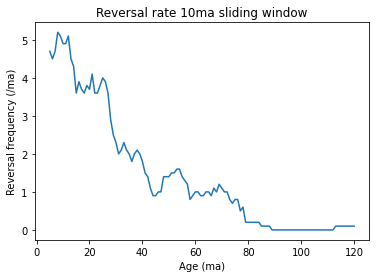

In [75]:
plt.plot(ages, revFreqs)
plt.title('Reversal rate 10ma sliding window')
plt.xlabel('Age (ma)')
plt.ylabel('Reversal frequency (/ma)')
plt.show()

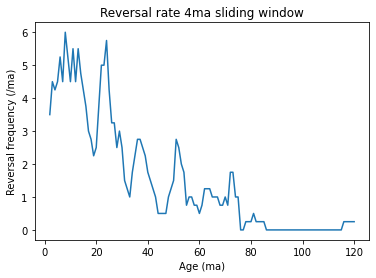

In [72]:
plt.plot(ages, revFreqs)
plt.title('Reversal rate 4ma sliding window')
plt.xlabel('Age (ma)')
plt.ylabel('Reversal frequency (/ma)')
plt.show()

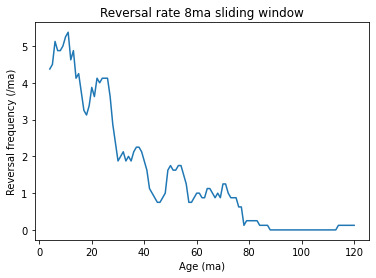

In [68]:
plt.plot(ages, revFreqs)
plt.title('Reversal rate 8ma sliding window')
plt.xlabel('Age (ma)')
plt.ylabel('Reversal frequency (/ma)')
plt.show()

(185/(100 - 0))
[0.0, 0.99, 1.77, 2.14, 2.581, 3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.894, 6.269, 6.935, 7.135, 7.341, 7.432, 7.65, 8.225, 8.699, 9.23, 9.58, 9.74, 9.92, 11.052, 11.476, 11.935, 12.184, 12.678, 12.775, 12.991, 13.302, 13.703, 14.178, 14.8, 15.034, 16.014, 16.327, 16.556, 17.277, 18.281, 19.048, 20.518, 20.996, 21.768, 22.151, 22.459, 22.588, 22.804, 23.353, 23.677, 23.999, 24.73, 24.835, 25.496, 25.823, 25.992, 27.027, 28.283, 28.578, 29.401, 29.765, 30.479, 33.058, 34.655, 35.343, 35.685, 36.618, 37.604, 37.92, 38.426, 39.631, 41.257, 42.536, 46.264, 49.037, 50.778, 51.047, 52.364, 52.757, 52.903, 55.904, 57.554, 60.92, 62.499, 63.976, 65.578, 67.735, 71.071, 71.587, 73.291, 73.619, 83.0, 0.78, 1.07, 1.95, 2.15, 3.04, 3.22, 3.58, 4.29, 4.62, 4.89, 5.23, 6.137, 6.567, 7.091, 7.17, 7.375, 7.562, 8.072, 8.257, 9.025, 9.308, 9.642, 9.88, 10.949, 11.099, 11.531, 12.078, 12.401, 12.708, 12.819, 13.139, 13.51, 14.076, 14.612, 14.888, 15.155, 16.293, 16.488, 16.726, 17.615, 18.7

1.85

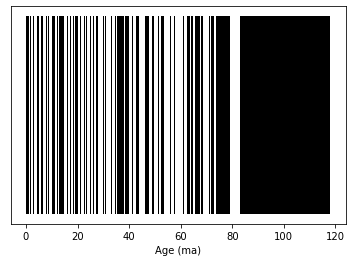

In [64]:
calc_rev_freq(0, 100)

    start of normal chron  end of normal chron
24                 11.052               11.099
25                 11.476               11.531
26                 11.935               12.078
27                 12.184               12.401
28                 12.678               12.708
29                 12.775               12.819
30                 12.991               13.139
31                 13.302               13.510
32                 13.703               14.076
33                 14.178               14.612
34                 14.800               14.888
35                 15.034               15.155
36                 16.014               16.293
37                 16.327               16.488
38                 16.556               16.726
39                 17.277               17.615
40                 18.281               18.781
    start of normal chron  end of normal chron  chron length
24                 11.052               11.099         0.047
25                 11.476       

C:\Users\murray98\AppData\Local\Temp/ipykernel_13096/3094737762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPTSselected['chron length'] = GPTSselected.apply(
C:\Users\murray98\AppData\Local\Temp/ipykernel_13096/3094737762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPTSselected['chron length'] = GPTSselected.apply(
C:\Users\murray98\AppData\Local\Temp/ipykernel_13096/3094737762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo


    start of normal chron  end of normal chron
88                 71.071               71.338
89                 71.587               73.004
90                 73.291               73.374
91                 73.619               79.075
    start of normal chron  end of normal chron  chron length
88                 71.071               71.338         0.267
89                 71.587               73.004         1.417
90                 73.291               73.374         0.083
91                 73.619               79.075         5.456


C:\Users\murray98\AppData\Local\Temp/ipykernel_13096/3094737762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPTSselected['chron length'] = GPTSselected.apply(


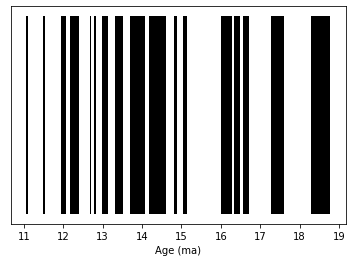

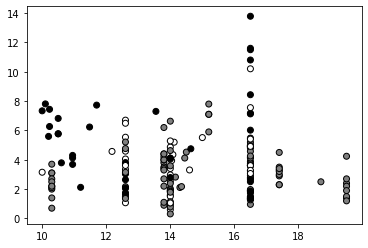

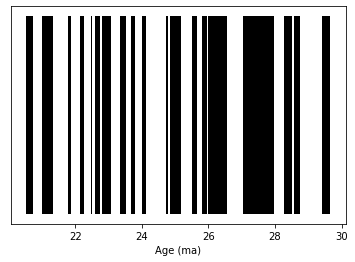

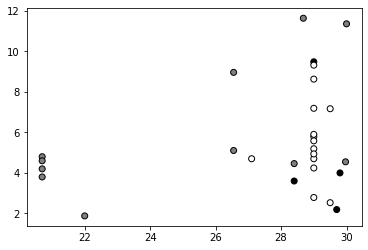

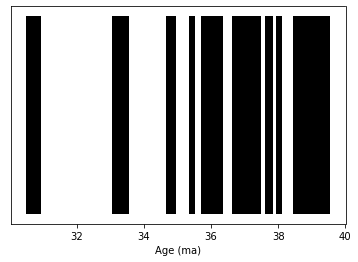

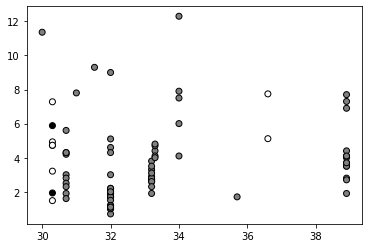

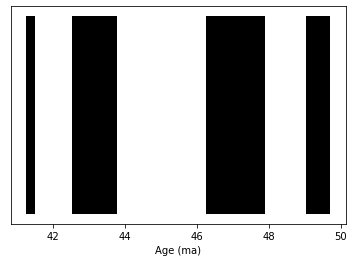

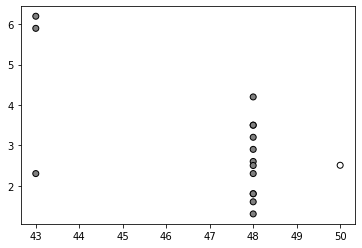

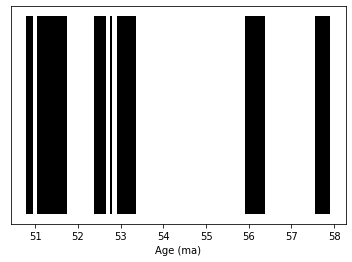

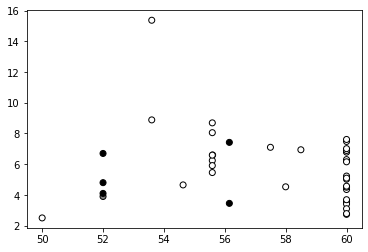

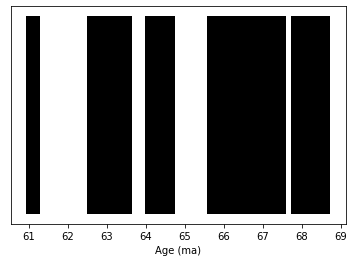

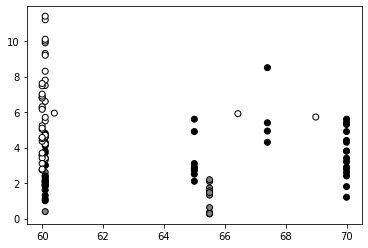

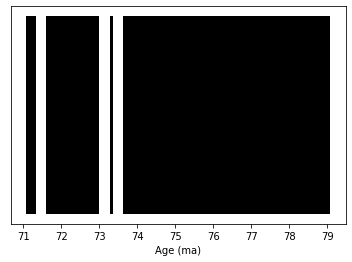

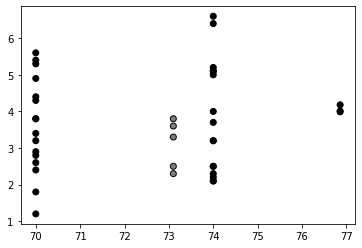

In [49]:
for runNumber in [1,2,3,4,5,6,7]:

    lowerAgeLimit = 10*runNumber #ma
    upperAgeLimit = 10*(runNumber+1) #ma
    QPIfilter = 3 #QPI score must be greater than or equal to filter


    GPTSselected = GPTS[(GPTS['start of normal chron']>=lowerAgeLimit) & (GPTS['end of normal chron']<=upperAgeLimit)]
    print(GPTSselected)
    GPTSselected['chron length'] = GPTSselected.apply(
        lambda row: row['end of normal chron'] - row['start of normal chron'], axis=1)

    print(GPTSselected)
    gptsList = GPTSselected.drop('end of normal chron', axis=1)
    gptsList = list(gptsList.itertuples(index=False, name=None))

    fig, ax = plt.subplots()
    #ax.set_axis_off()
    ax.broken_barh(gptsList, (0,1), facecolors='black')
    ax.get_yaxis().set_visible(False)
    ax.set_xlabel('Age (ma)')

    reversalFreq = (len(GPTSselected)/(upperAgeLimit- lowerAgeLimit))*2 #list is just list of normal chrons start times

    PINTselected = PINT[(PINT.QPI>=QPIfilter) & (PINT.AGE>=lowerAgeLimit) & (PINT.AGE<=upperAgeLimit)]

    ##Fix missing polarity values with filler
    values = {"P": 'O'}
    PINTselected = PINTselected.fillna(value=values)

    for i in range(len(PINTselected)):
        pol1 = PINTselected.loc[PINTselected.index[i], 'P'] 
        if pol1 not in ['N' ,'R', 'T', 'O']:
            print (PINTselected.index[i], pol1)
            if pol1 =='N ':
                PINTselected.loc[PINTselected.index[i], 'P'] = 'N'
            if pol1 =='R ':
                PINTselected.loc[PINTselected.index[i], 'P'] = 'R'
            print(PINTselected.loc[PINTselected.index[i], 'P'])

    colors = {'N':'black','R':'white', 'T':'grey', 'O':'grey'}

    fig, ax = plt.subplots()
    ax.scatter(PINTselected['AGE'], PINTselected['allVDM'], c=PINTselected['P'].map(colors), edgecolors= "black")

    PINTselected[(PINTselected.allVDM>=20)]

    #PINTselected = PINTselected.drop(labels=[4651, 4652, 4653, 4656, 4657, 4659])

    mean = PINTselected["allVDM"].mean()
    mean

    std = PINTselected["allVDM"].std()
    std

    PINTselected = PINTselected.sort_values(by=['AGE'])
    PINTselected

    ## The polarity record in PINT is not good enough to calculate reversal rate
    # reversalTimes = []
    # countReversals = 0
    # for i in range(len(PINTselected)-1):
    #     pol1 = PINTselected.loc[PINTselected.index[i], 'P']    
    #     pol2 = PINTselected.loc[PINTselected.index[i+1], 'P']

    #     while (pol1 == 'O' or pol1 == 'T'): #transistional or non-reported directions
    #         #print('No polarity reported for: ', i)
    #         i-=1 
    #         #print('huh ', i)
    #         pol1 = PINTselected.loc[PINTselected.index[i], 'P']
    #         #print(pol1, i)

    #     if (pol1=='R'and pol2=='N') or (pol1=='N'and pol2=='R'):
    #         countReversals+=1
    #         #print('Reversal at: ', i)
    #         reversalTimes.append(PINTselected.loc[PINTselected.index[i+1], 'AGE'])
    # print('Number of reversals: ', countReversals)

    # reversals = []
    # for i in range(0,(len(reversalTimes) -1),2):
    #     reversal = (reversalTimes[i], reversalTimes[i+1]-reversalTimes[i])
    #     reversals.append(reversal)
    # fig, ax = plt.subplots()
    # ax.broken_barh(reversals, (0,1), facecolors='black')
    # ax.get_yaxis().set_visible(False)

    PINTdata = {
      "lower age limit": lowerAgeLimit,
      "upper age limit": upperAgeLimit,
      "mean": mean,
        "std": std,
        "Reversal rate": reversalFreq
    }
    PINTdata

    resultsName = f"PINTdata_{runNumber}.json"
    with open(resultsName, "w") as outfile:
        json.dump(PINTdata, outfile)